## Importing necessary libraries

In [ ]:
# import the important packages
import pandas as pd               # library used for data manipulation and analysis
import numpy as np                # library used for working with arrays
import matplotlib.pyplot as plt   # library for visualization
import seaborn as sns             # library for visualization
%matplotlib inline

import scipy.stats as stats       # this library contains a large number of probability distributions as well as a growing library of statistical functions

In [ ]:
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount Google Colab drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load data from csv file
data = pd.read_csv('/content/drive/MyDrive/MIT - Data Sciences/Colab Notebooks/Week Two - Statistics for Data Science/Practice Exercise/assignment.csv')

# Binomial Distribution

### Q1. A LED bulb manufacturing company regularly conducts quality checks at specified periods on the products it manufactures.  Historically, the failure rate for LED light bulbs that the company manufactures is 5%. Suppose a random sample of 10 LED light bulbs is selected. Find the probability distribution for the defective bulbs and answer the following questions.

**a) What is the probability that none of the LED bulbs are defective?**

In [ ]:
# calculate the probability distribution

# declare the sample size n
n = 10

# declare p which represents the probability of failure
p = 0.05

# declare different possible number of defective bulbs in the sample
k = np.arange(0,11)

# import the required function
from scipy.stats import binom

# use the binom.pmf() function to generate the probability distribution
binomial = binom.pmf(k=k, n=n, p=p)

# The probability that no bulbs are defective is
binomial[0]


0.5987369392383789

### The probability that no bulbs are defective: 0.5987

**b) What is the probability that exactly one LED bulb is defective?**

In [ ]:
# The probability that only 1 bulb is defective is
binomial[1]

0.3151247048623047

### The probability of exactly one defective bulb: 0.3151

**c) What is the probability that two or fewer LED bulbs are defective?**

Hint: We need to calculate the cumulative probability of two or fewer LED bulbs being defective.

In [ ]:
# calculate cdf for 2 bulbs
binom.cdf(k=2, n=n, p=p)

0.9884964426207031

### Probability of two or fewer defective bulbs: 0.9885

**d) What is the probability that three or more LED bulbs are defective?**

Hint: We need to subtract the cumulative probability of up to 2 defective LED bulbs from 1.

In [ ]:
# calculate cdf for 3 bulbs
1 - binom.cdf(k=2, n=n, p=p)

0.01150355737929687

### The probabilty of three or more defective LEDs is: 0.0115

### Q2. During an NBA game, a basketball player has two foul shots (free throw) and the conversion rate of free-throw shots is 93%. Find the following probabilities.

**a) What is the probability that the player will convert both the shots?**

In [ ]:
# calculate the probability distribution

# declare the sample size n
n = 2

# declare p which represents the probability of success
p = 0.93

# declare possible number of possible shots in the sample
k = np.arange(0,3)

# import the required function
from scipy.stats import binom

# use the binom.pmf() function to generate the probability distribution
binomial = binom.pmf(k=k, n=n, p=p)

# The probability that exactly 2 shots are made
binomial[2]


0.8649000000000001

### The probabilty the player will convert both shots: 0.8649

**b) What is the probability that the player will convert at least one shot?**

In [ ]:
# The probability that at least one shot is made
binomial[1] + binomial[2]     #binomial[1] - the probability of making exactly 1 shot, binomial[2] - the probabilty of making exactly 2 shots

# Alternatley this can be calculated using the compliment rule
#1 - binomial[0]

0.9951000000000001

### The probability the player will convert at least one shot: 0.9951

### Q3.	Over a long period in a large multinomial corporation, 10% of all sales trainees rated as outstanding, 75% rated as excellent, 10% rated as satisfactory, and 5% are considered unsatisfactory. Find the following probabilities for a sample of 10 trainees selected at random.

**a) Two are rated as outstanding**

In [ ]:
# calculate the probability distribution

# declare the sample size n
n = 10

# declare p which represents the probability of success
p = 0.1   # outstanding

# declare possible number of possible trainees in the sample
k = 2

# import the required function
from scipy.stats import binom

# use the binom.pmf() function to generate the probability distribution
prob_2_outstanding = binom.pmf(k=k, n=n, p=p)
prob_2_outstanding

0.19371024450000007

### The probabilty of two trainees are rated as outstanding: 0.1937

**b) Two or more are rated as outstanding**

In [ ]:
# declare the sample size n
n = 10

# declare p which represents the probability of success
p = 0.1   # outstanding

# declare possible number of possible trainees in the sample
k = 1

# import the required function
from scipy.stats import binom

# use the binom.pmf() function to generate the probability distribution
prob_two_or_more_outstanding  = 1- binom.cdf(k=k, n=n, p=p)
prob_two_or_more_outstanding


0.26390107090000003

### The probabilty of two or more trainees are rated as outstanding: 0.2639

**c) Eight of the ten are rated either outstanding or excellent**

In [ ]:
n = 10

p0 = 0.1
p1 = 0.75
p = p0 + p1

k = 8

# import the required function
from scipy.stats import binom

# use the binom.pmf() function to generate the probability distribution
prob_eight_outstanding_excellent = binom.pmf(k=k, n=n, p=p)
prob_eight_outstanding_excellent

0.27589665660205076

### The probability eight of the ten are rated either outstanding or excellent: 0.2758

**d) None of the trainees are rated as unsatisfactory**

In [ ]:
n = 10
p = 0.05
k = 0

# import the required function
from scipy.stats import binom

# use the binom.pmf() function to generate the probability distribution
prob_none_unsatisfactory = binom.pmf(k=k, n=n, p=p)
prob_none_unsatisfactory


0.5987369392383789

### The probability that none of the trainees are rated as unstaisfactory: 0.598

# Uniform Distribution

### Q4. A University records the time taken by students to solve the statistics assignment in 'assignment.csv’. Plot the probability distribution this data follows and answer the following questions.

In [ ]:
data.head()

,Student_ID,Time_taken
0,955,2.79
1,379,3.32
2,922,1.35
3,312,2.35
4,670,1.98


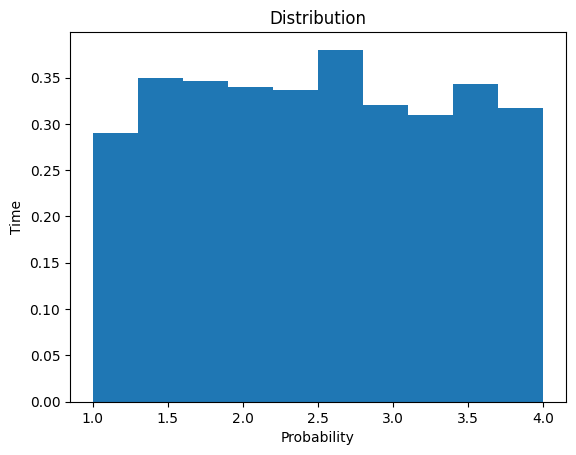

In [ ]:
# Plot the probability distribution this data

# import library
from scipy.stats import uniform

# Find the min and max of time taken
min = data['Time_taken'].min()
max = data['Time_taken'].max()
scale = max - min

# Generate pdf values
x = np.linspace(min, max, 100)
pdf = uniform.pdf(x, loc=min, scale=scale)

# Plot the PDF
plt.hist(data['Time_taken'],  density=True)
plt.xlabel('Probability')
plt.ylabel('Time')
plt.title('Distribution')
plt.show()

**a) Find the probability that a randomly selected student requires at most 2.5 hours to complete the assignment.**

**CDF:** of a random variable (X) is the probability that X will take the value less than or equal to x. It can be represented mathematically as below:

>$F_X(x) = P(X\leq x)$

In our case, the random variable (X) is the number of hours.

$ P(X\leq 2.5)$

In [ ]:
time_taken = 2.5
probability = uniform.cdf(time_taken, loc=min, scale=scale)
probability

0.5

### Probability that a randomly selected student requires at most 2.5 hours to complete the assignment: 0.5

**b) Find the probability that a randomly selected student requires at least 3 hours to complete the quiz.**

$ P(X>=3)$

In [ ]:
time_taken = 3
probability = (1 - uniform.cdf(time_taken, loc=min, scale=scale))
probability

0.33333333333333337

### Probability that a randomly selected student requires at least 3 hours to complete the quiz: 0.3333

**c) Find the probability that a randomly selected student requires 1.5 to 3.5 hours to complete the quiz.**

$ P(1.5<= X <=3.5)$

In [ ]:
probability = (uniform.cdf(3.5, loc=min, scale=scale) - uniform.cdf(1.5, loc=min, scale=scale))
probability

0.6666666666666667

### probability that a randomly selected student requires 1.5 to 3.5 hours to complete: 0.6667

# Normal Distribution

### Q5. According to the Telecommunication Industry, the average monthly cell phone bill is Rs. 850 with a standard deviation of Rs. 150. Assuming that the monthly bill follows a normal distribution, answer the following questions.

**a) What is the probability that a randomly selected cell phone bill is more than Rs 1200?**

In [ ]:
# Import library
from scipy.stats import norm

# Define variables
x   = 1200
mu  = 850
std = 150

# Calculate probability
Probability = (1 - norm.pdf(x, mu, std))
Probability

0.999825187406042

### Probability that a randomly selected cell phone bill is more than Rs 1200: .9998

**b) What is the probability that a randomly selected cell phone bill is between Rs 750 and Rs 1200?**

In [ ]:
# Define variables
x1   = 1200
x2   = 750
mu   = 850
std  = 150

probability = (norm.cdf(x1, mu, std) - norm.cdf(x2, mu, std))
probability

0.7376921338244318

### Probability that a randomly selected cell phone bill is between Rs 750 and Rs 1200: 0.7377

**c) What is the probability that a randomly selected cell phone bill is no more than Rs 650?**

In [ ]:
# Define variables
x   = 650

# Calculate probability
Probability = norm.cdf(x, mu, std)
Probability

0.09121121972586788

### Probability that a randomly selected cell phone bill is no more than Rs 650: 0.0912

**d) What is the amount above which lies in the top 15% of cell phone bills?**

In [ ]:
# Define variables
p = 1 - 0.15

# Calculate amount
amount = norm.ppf(p, mu, std)
amount


1005.4650084240685

### Amount above which lies in the top 15% of cell phone bills: 1005.46

**e) What is the amount below which lies the bottom 25% of cell phone bills?**

In [ ]:
# Define variables
p = 0.25

# Calculate amount
amount = norm.ppf(p, mu, std)
amount

748.8265374705877

### Amount below which lies the bottom 25% of cell phone bills: 748.82

### Q6. The mean filling capacity for a coke bottle is 500 ml with a standard deviation of 20 ml. Assume that it follows a normal distribution and answer the following questions.

**a) What is the probability that the bottle filled less than 480 ml?**

In [ ]:
# Define variables
x   = 480
mu  = 500
std = 20

# Calculate probability
Probability = norm.cdf(x, mu, std)
Probability


0.15865525393145707

### Probability that the bottle filled less than 480 ml: 0.1586

**b) What is the probability that the bottle filled more than 520 ml?**

In [ ]:
# Define variables
x   = 520
mu  = 500
std = 20

# Calculate probability
Probability = (1 - norm.cdf(x, mu, std))
Probability

0.15865525393145707

### Probability that the bottle filled more than 520 ml: 0.1586

**c) What is the probability that the bottle filled between 470 ml to 525 ml?**

In [ ]:
# Define variables
x1  = 525
x2  = 470
mu  = 500
std = 20

# Calculate probability
p1 = norm.cdf(x1, mu, std)
p2 = norm.cdf(x2, mu, std)

Probability = p1 - p2
Probability

0.8275430250642866

### Probability that the bottle filled between 470 ml to 525 ml: 0.8275

### Q7. In 2 Liter soft drink bottles, the drink filled is normally distributed, with a mean of 2.0 liters and a standard deviation of 0.05 liter. If bottles contain less than 95% of the listed net content (1.90 liters), the manufacturer may be subject to a penalty by the state office of consumer affairs. Bottles that have a net quantity above 2.1 liters may cause excess spillage upon opening. Answer the following questions.

**a) What is the probability that the bottle content is between 1.9 and 2.0 liters?**

In [ ]:
# Define variables
x1  = 2.0
x2  = 1.9
mu  = 2.0
std = 0.05

# Calculate probability
p1 = norm.cdf(x1, mu, std)
p2 = norm.cdf(x2, mu, std)

Probability = p1 - p2
Probability

0.4772498680518209

### Probability that the bottle content is between 1.9 and 2.0 liters: 0.4772

**b) What is the probability that the bottle content is between 1.9 and 2.1 liters?**

In [ ]:
# Define variables
x1 = 2.1
x2 = 1.9
mu = 2.0
std = 0.05

# Calculate probability
p1 = norm.cdf(x1, mu, std)
p2 = norm.cdf(x2, mu, std)

Probability = p1 - p2
Probability

0.9544997361036418

### Probability that the bottle content is between 1.9 and 2.1 liters: 0.9545

**c) What is the probability that the bottle content is below 1.9 liters or above 2.1 liters?**

In [ ]:
# Define variables
x1 = 2.1
x2 = 1.9
mu = 2.0
std = 0.05

# Calculate probability
p1 = 1 - norm.cdf(x1, mu, std)
p2 = norm.cdf(x2, mu, std)

Probability = p1 + p2
Probability

0.045500263896358195

### Probability that the bottle content is below 1.9 liters or above 2.1 liters: 0.0455

**d) 99% of the bottles contain at least what amount of soft drink in them?**

In [ ]:
# Define variables
x   = 0.01
mu  = 2.0
std = 0.05

Probability = norm.ppf(x, mu, std)
Probability

1.883682606297958

### 99% of the bottles contain at least what amount of soft drink in them: 1.8837

# Sampling Distribution

### Q8. Suppose an automobile battery manufacturer claims that the mean lifetime of their battery is 60 months with a standard deviation of 6 months. Suppose the distribution of battery life is approximately normal. Find the probability that the mean lifetime of 40 randomly sampled batteries will be less than 58 months.

In [ ]:
# Define variables
mu    = 60  # population mean
sigma = 6   # population standard deviation
n     = 40  # sample size
x_bar = 58  # sample mean

# Calculate Standard Error of x_bar
SE = sigma / np.sqrt(n)

# Calculate the z-score
z = (x_bar - mu) / SE

# Calculate probability
Probability = norm.cdf(z)
Probability

0.017507490509831244

### Probability that the mean lifetime of 40 randomly sampled batteries will be less than 58 months: 0.0175

# Interval Estimation

### Q9. A random sample of 40 households was selected as part of a study on electricity usage, and the number of kilowatt-hours (kWh) was recorded for each household in the sample for the first quarter of 2020. The average usage was found to be 310 kWh. In a very large study in the first quarter of the previous year, it was found that the standard deviation of the usage was 89 kWh.

### Assuming the standard deviation is unchanged and that the usage is normally distributed, provide an expression for calculating a 95% confidence interval for the mean usage in the first quarter of 2019.

In [ ]:
# Define variables
n     = 40    # sample size
x_bar = 310   # sample mean
sigma = 89    # population standard deviation
CI    = 0.95  # Confidence Interval

# Calculate Standard Error of x_bar
SE = sigma / np.sqrt(n)

# Calculate the interval
np.round(norm.interval(CI, loc=x_bar, scale=SE), 2)


array([282.42, 337.58])

### 95% confidence interval for the mean usage in the first quarter of 2019 will be between: 282.42 and 337.58

# Hypothesis Testing

### Q10. You are a manager of a Chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. State the null and alternative hypotheses.

### Null Hypothesis H_0:
The null hypothesis would state that the waiting time to place an order has not changed from the previous population mean value of 4.5 minutes.

H_0: mu = 4.5

### Alternative Hypothesis H_a:
The alternative hypothesis would state that the waiting time to place an order has changed from the previous population mean value of 4.5 minutes. Since we are interested in detecting any change (either an increase or a decrease), this is a two-tailed test.

 H_a: mu != 4.5

### Q11. What is the p-value if in a two-tail hypothesis test Z-stat = +2.00?

In [ ]:
# Given Z-statistic
z_stat = 2.00

# Calculate the cumulative probability for Z <= 2.00
p_one_tail = 1 - norm.cdf(z_stat)

# Calculate the two-tail p-value
p_value = 2 * p_one_tail
p_value


0.04550026389635842